In [3]:
import pandas as pd
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
import numpy as np
import torch
import os

In [4]:
path = 'categorized_resized_byteplot_split/'

dls = ImageDataLoaders.from_folder(path, valid="val", train="train", seed="696969", bs=16)
dls.valid_ds.items[:3]

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


[Path('byteplot_pe_doc/val/malware_doc/00152b73b2b30f45819bcc2f6001a9a4.png'),
 Path('byteplot_pe_doc/val/malware_doc/00177f935349d66229058760f8038991.png'),
 Path('byteplot_pe_doc/val/malware_doc/0047188058432c4fc73905835508348f.png')]

SuggestedLRs(valley=0.0004786300996784121)

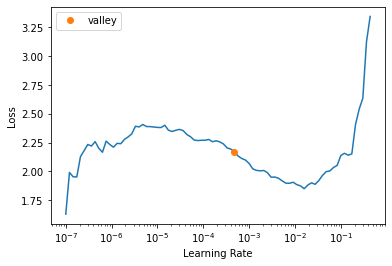

In [5]:

learner = vision_learner(dls, resnet101)
torch.cuda.empty_cache()
learner.lr_find()

In [6]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.190023,0.129001,1:04:54


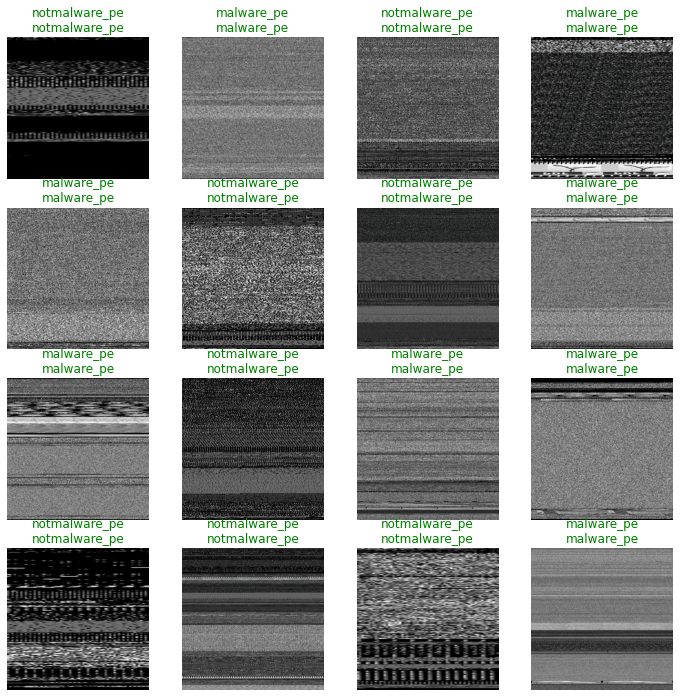

In [7]:
learner.show_results(max_n=16)

In [8]:
torch.save(learner, "model_resnet101_pe.pkl")

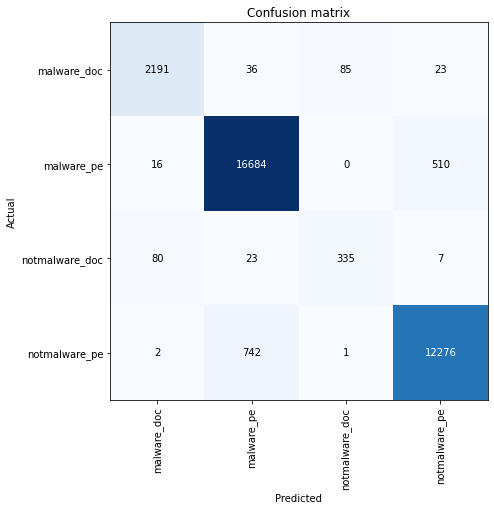

In [9]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

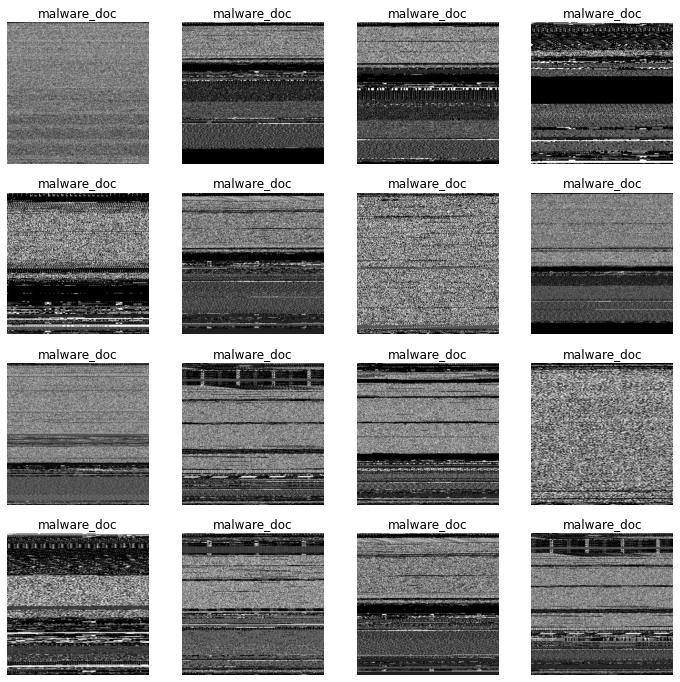

In [10]:

test_images = get_image_files(f'{path}/test')
test_dl = dls.test_dl(test_images, with_labels=True)
test_dl.show_batch(max_n=30)

In [11]:
preds, y = learner.get_preds(dl=test_dl)

In [12]:
accuracy(preds,y)

TensorBase(0.9563)